# CoinMarketCap.com Scraper
We used beautifulsoup to scrape coinmarketcap.com data from the table on the homepage of the website. We are interested in visualizing this data along with historical cryptocurrency pricing data to understand changes in market capitalization over time.

In [30]:
import os
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
from re import sub
import re
from decimal import Decimal
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')

In [2]:
## define URL to scrape from and view all html
coin_marketcap_url = 'https://coinmarketcap.com/'
html = requests.get(coin_marketcap_url)
print(html.text)

<!doctype html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="is-theme-standard" lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8">
<meta http-equiv="x-ua-compatible" content="ie=edge"><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"VQ4BV1dWDxABVFdQAQIEX1M="};window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<e.length;o++)r(e[o]);return r}({1:[function(t,n,e){function r(t){try{s.console&&console.log(t)}catch(n){}}var o,i=t("ee"),a=t(15),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&

We made minor changes to code from the following GitHub repo (commenting our own):  
https://github.com/bertmiller/Pulling-CoinMarketCap-Data/blob/master/coin_market_supply.py

In [3]:
# define BS object and find <table> element to scrape from
soup = BeautifulSoup(html.text, 'lxml')
table = soup.find('table')

# define empty dictionary
dict1 = {'coin_position': [np.nan], 'coin_name': [np.nan], 'coin_marketcap': [np.nan], 'coin_price': [np.nan], 'coin_supply': [np.nan]}
coin_data = pd.DataFrame(dict1)

# iteratre through rows or <tr> objects to add rows to dataframe
for row in table.find_all('tr')[1:]:
    # get each column or cell <td> object
    col = row.find_all('td')

    # create temporary variables to store each column's value + remove whitespace
soup = BeautifulSoup(html.text, 'lxml')
table = soup.find('table')

dict1 = {'coin_position': [np.nan], 'coin_name': [np.nan], 'coin_marketcap': [np.nan], 'coin_price': [np.nan], 'coin_supply': [np.nan]}
coin_data = pd.DataFrame(dict1)

for row in table.find_all('tr')[1:]:
    col = row.find_all('td')

    coin_position = col[0].text.strip()
    coin_name = col[1].text.strip()
    coin_marketcap = col[2].text.strip()
    coin_price = col[3].text.strip()
    coin_supply = col[4].text.strip().split(" ")[0].rstrip() # last column has extra characters after a space, split on space and remove remaining white space at end using .rstrip() to remove

    # temporary df that cointains single rows to be appended to coin_data df
    temp_df = {'coin_position': coin_position, 'coin_name': coin_name, 'coin_marketcap': coin_marketcap, 'coin_price': coin_price, 'coin_supply': coin_supply}
    coin_supply = col[4].text.strip().split(" ")[0].rstrip()

    temp_df = {'coin_position': coin_position, 'coin_name': coin_name, 'coin_marketcap': coin_marketcap, 'coin_price': coin_price, 'coin_supply': coin_supply}

    coin_data = coin_data.append(temp_df, ignore_index=True)

coin_data = coin_data.drop(0)
print(coin_data)

# save as CSV
coin_data.to_csv('coinmarketcapdata.csv', index = False)

        coin_marketcap              coin_name coin_position coin_price  \
1    1.57614275942e+11           BTC\nBitcoin             1   $9264.82   
2        71641606078.4          ETH\nEthereum             2    $722.22   
3        34190356500.1            XRP\nRipple             3  $0.873231   
4        25758714675.0      BCH\nBitcoin Cash             4   $1505.75   
5        15725273183.5               EOS\nEOS             5     $18.93   
6        9989129882.74           ADA\nCardano             6  $0.385278   
7        8666982280.45          LTC\nLitecoin             7    $153.79   
8         8185103480.2           XLM\nStellar             8  $0.440725   
9        6387860905.78            MIOTA\nIOTA             9      $2.30   
10        5887611901.6              TRX\nTRON            10  $0.089548   
11        5609500000.0               NEO\nNEO            11     $86.30   
12       3972376657.63            XMR\nMonero            12    $248.40   
13       3905682459.01             DAS

#### Visualize Top 10 Cryptocurrencies 

In [4]:
cmc_bitcoin_historical_url = 'https://coinmarketcap.com/currencies/bitcoin/historical-data/'
html = requests.get(cmc_bitcoin_historical_url)


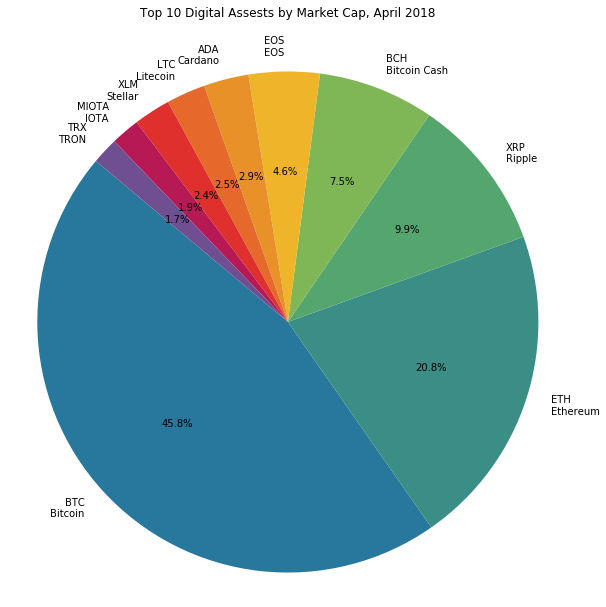

In [7]:
## Static Pie Chart
## Visualize market cap of top 10 crypto currencies in 2018

import matplotlib.pyplot as plt
year=2018
colors = ['#28779c','#3b8e85','#54a56e','#7fb757','#eeb52b','#e89128','#e4692a','#df302d','#b71954','#6f4f91']
# Plot
plt.figure(figsize=(10,10))
plt.pie(coin_data['coin_marketcap'].head(10), colors=colors,labels=coin_data['coin_name'].head(10),
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.title("Top 10 Digital Assests by Market Cap, April %d \n\n" % year)
plt.axis('equal')
plt.show()

In [8]:
## scrape 2013-2018
## historical data for INTERACTIVE visualization

cmc_2013 = 'https://coinmarketcap.com/historical/20130526/'
cmc_2014 = 'https://coinmarketcap.com/historical/20140427/'
cmc_2015 = 'https://coinmarketcap.com/historical/20150426/'
cmc_2016 = 'https://coinmarketcap.com/historical/20160424/'
cmc_2017 = 'https://coinmarketcap.com/historical/20170430/'
cmc_2018 = 'https://coinmarketcap.com/historical/20180422/'
def historical_scraper(cmc_data):
    html = requests.get(cmc_data)
    soup = BeautifulSoup(html.text, 'lxml')
    table = soup.find('table')

    dict1 = {'coin_position': [np.nan], 'coin_name': [np.nan], 'coin_marketcap': [np.nan], 'coin_price': [np.nan], 'coin_supply': [np.nan], 'coin_volume': [np.nan]}
    coin_data = pd.DataFrame(dict1)

    for row in table.find_all('tr')[1:]:
        col = row.find_all('td')

        coin_position = col[0].text.strip()
        coin_name = col[1].text.strip()
        coin_symbol = col[2].text.strip()
        coin_marketcap = col[3].text.strip()
        coin_price = col[4].text.strip()
        coin_supply = col[5].text.strip()
        coin_volume = col[6].text.strip()

        temp_df = {'coin_position': coin_position, 'coin_name': coin_name, 'coin_marketcap': coin_marketcap, 'coin_price': coin_price, 'coin_supply': coin_supply, 'coin_volume': coin_volume}

        coin_data = coin_data.append(temp_df, ignore_index=True)

    coin_data = coin_data.drop(0)
    return coin_data

In [10]:
## run each year through bs parser
scrape_13 = historical_scraper(cmc_2013)
scrape_14 = historical_scraper(cmc_2014)
scrape_15 = historical_scraper(cmc_2015)
scrape_16 = historical_scraper(cmc_2016)
scrape_17 = historical_scraper(cmc_2017)
scrape_18 = historical_scraper(cmc_2018)
os.system('say "DONE"')

0

In [11]:
## add year column, to distinguish years after merge (next block)
scrape_13['year']=2013
scrape_14['year']=2014
scrape_15['year']=2015
scrape_16['year']=2016
scrape_17['year']=2017
scrape_18['year']=2018

## save each file to csv
scrape_13.to_csv('scrape_13.csv', index = False)
scrape_14.to_csv('scrape_14.csv', index = False)
scrape_15.to_csv('scrape_15.csv', index = False)
scrape_16.to_csv('scrape_16.csv', index = False)
scrape_17.to_csv('scrape_17.csv', index = False)
scrape_18.to_csv('scrape_18.csv', index = False)

In [12]:
## merge all years into 1 df
frames = [scrape_13.head(10),scrape_14.head(10),scrape_15.head(10),scrape_16.head(10),scrape_17.head(10),scrape_18.head(10)]
scrape_all_years = pd.concat(frames)
scrape_all_years.shape

(60, 7)

In [14]:
## small issues with '$' and '.' in currency columns, need to clean up
clean=[]
for price in scrape_all_years.coin_marketcap:
    clean.append(int(Decimal(sub(r'[^\d.]', '', price))))
scrape_all_years.coin_marketcap = clean
scrape_all_years

## save merged data to csv (only contains top 10 coins for each year)
scrape_all_years.to_csv('scrape_all_years.csv', index = False)

In [16]:
## build function to be fed into interactive slider
## function takes in year as parameter, outputs, pie plot for year selected in slider

def PiePlot(year):
    """
    parameter: year (int)
    output:    plot (pie chart)
    
    This function processes data from scrape_all_years merged data from coinmarketcap.com 
    and displays a pie chart visualization of the 10 largest digital assets 
    for each year from 2013 to 2018. The year parameter is obtained from an interactive slider 
    called below the function that can take on int values {2013, 2014, 2015, 2016, 2017, 2018}.
    """
    colors = ['#28779c','#3b8e85','#54a56e','#7fb757','#eeb52b','#e89128','#e4692a','#df302d','#b71954','#6f4f91']
    plt.figure(figsize=(10,10))
    plt.title("Top 10 Digital Assests by Market Cap, April %d "% year, y=1.2)
    plt.axis('equal')
    y = scrape_all_years.coin_marketcap.loc[scrape_all_years['year'] == year]
    if year > 2016:
        pct='%0.2f%%'
        plt.pie(y, colors=colors,labels=scrape_all_years.coin_name.loc[scrape_all_years['year'] == year], 
            autopct=pct, shadow=False, startangle=140, radius = 1.4)
    else:
        pct='%1d%%'
        patches, texts = plt.pie(y, colors=colors, startangle=140, radius = 1.4)
        labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(scrape_all_years.coin_name.loc[scrape_all_years['year'] == year], 100.*y/y.sum())]
        sort_legend = True
        if sort_legend:
            patches, labels, _ =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
        plt.legend(patches, labels,  bbox_to_anchor=(1.1,1), loc="upper right", 
                          bbox_transform=plt.gcf().transFigure,
           fontsize=8)
    
    
    plt.show()

interact(PiePlot, year=widgets.IntSlider(min=2013,max=2018,step=1,value=2018));

interactive(children=(IntSlider(value=2018, description='year', max=2018, min=2013), Output()), _dom_classes=('widget-interact',))

In [17]:
## reshape merged 
slope_data = scrape_all_years.pivot(index='coin_name', columns='year', values='coin_marketcap')
slope_data.to_csv('merged_data_reshaped.csv', index = False)
slope_data.fillna(0, inplace = True)
slope_data

year,2013,2014,2015,2016,2017,2018
coin_name,,,,,,
ADA\nCardano,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.433052e+09
AMP\nSynereo,0.000000e+00,0.000000e+00,0.000000e+00,1.183288e+07,0.000000e+00,0.000000e+00
BANX\nBanx,0.000000e+00,0.000000e+00,6.751096e+06,0.000000e+00,0.000000e+00,0.000000e+00
BCH\nBitcoin Cash,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.964355e+10
BLK\nBlackCoin,0.000000e+00,1.173159e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
BTC\nBitcoin,1.477901e+09,5.796073e+09,3.104259e+09,7.012886e+09,2.148589e+10,1.508269e+11
BTS\nBitShares,0.000000e+00,0.000000e+00,1.083638e+07,0.000000e+00,0.000000e+00,0.000000e+00
CNC\nCHNCoin,3.675730e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
DASH\nDash,0.000000e+00,7.230012e+06,1.588520e+07,4.132908e+07,6.865816e+08,0.000000e+00


In [18]:
slope_dict = {}
colors = ['#ffffe0','#fff8d1','#ffefc2','#ffe7b4','#ffdfa8','#ffd59c','#ffcd92','#ffc489','#ffbb82','#ffb17b','#ffa775','#ff9d70','#ff936c','#fc8b69','#f98166','#f67762','#f26f60','#ee655d','#e95d5a','#e55457','#df4b54','#d9434f','#d43a4b','#cc3146','#c52940','#bf213a','#b71933','#af112b','#a70a23','#9e041a','#94010f','#8b0000']
for c,index in enumerate(slope_data.index):
    slope_dict[index] = colors[c]

In [23]:
f = slope(slope_data,kind='interval', color = slope_dict,height= 20,width=28,font_size=18, marker = None)

NameError: name 'slope' is not defined

In [24]:
## exchange analysis for BTC, ETH, XRP
btc_url = 'https://coinmarketcap.com/currencies/bitcoin/#markets'
eth_url = 'https://coinmarketcap.com/currencies/ethereum/#markets'
xrp_url = 'https://coinmarketcap.com/currencies/ripple/#markets'
def exchange_scraper(cmc_data):
    html = requests.get(cmc_data)
    soup = BeautifulSoup(html.text, 'lxml')
    table = soup.find('table')

    dict1 = {'source': [np.nan], 'pair': [np.nan], 'volume': [np.nan], 'price': [np.nan]}
    exchange_data = pd.DataFrame(dict1)

    for row in table.find_all('tr')[1:]:
        col = row.find_all('td')
 
        source = col[1].text.strip()
        pair = col[2].text.strip()
        volume = col[3].text.strip().split(" ")[0].rstrip()
        price = col[4].text.strip()

        temp_df = {'source': source, 'pair': pair, 'volume': volume, 'price': price}

        exchange_data = exchange_data.append(temp_df, ignore_index=True)

    exchange_data = exchange_data.drop(0)
    return exchange_data

## run scraped on top 3 cryptos
btc_data = exchange_scraper(btc_url)
eth_data = exchange_scraper(eth_url)
xrp_data = exchange_scraper(xrp_url)

In [25]:
## write to csv
btc_data.to_csv('btc_data.csv',index=False)
eth_data.to_csv('eth_data.csv',index=False)
xrp_data.to_csv('xrp_data.csv',index=False)

In [31]:
clean=[]
for price in btc_data.price:
    clean.append(int(re.sub("[^0-9]", "", price)))
btc_data.price = clean

In [36]:
clean_vol = []
for vol in btc_data.volume:
    clean_vol.append(int(re.sub("[^0-9]", "", vol)))
    
btc_data.volume = clean_vol
btc_data[btc_data['pair']]

KeyError: "['BTC/USDT' 'BTC/USDT' 'BTC/USD' 'BTC/USDT' 'BTC/KRW' 'ONT/BTC' 'ETH/BTC'\n 'ETH/BTC' 'EOS/BTC' 'BTC/JPY' 'BTC/USD' 'BTC/USD' 'BTC/CNY' 'BTC/USD'\n 'BCH/BTC' 'BTC/JPY' 'BTC/KRW' 'TRX/BTC' 'BCH/BTC' 'BCC/BTC' 'VET/BTC'\n 'ADA/BTC' 'GNT/BTC' 'EOS/BTC' 'IOTA/BTC' 'XRP/BTC' 'XVG/BTC' 'QTUM/BTC'\n 'BCC/BTC' 'BCH/BTC' 'ETH/BTC' 'RDD/BTC' 'BTC/USD' 'BTC/USD' 'CTXC/BTC'\n 'BTC/EUR' 'ETC/BTC' 'HSR/BTC' 'BTC/USDT' 'ZIL/BTC' 'DOGE/BTC' 'LTC/BTC'\n 'BCH/BTC' 'WAN/BTC' 'BTC/CKUSD' 'ETH/BTC' 'XVG/BTC' 'LOOM/BTC' 'SRN/BTC'\n 'ETH/BTC' 'BTC/USD' 'RDD/BTC' 'IOST/BTC' 'TRX/BTC' 'TRUE/BTC' 'BTC/CNY'\n 'HSR/BTC' 'EKT/BTC' 'NEO/BTC' 'LTC/BTC' 'XVG/BTC' 'BTC/USD' 'BNB/BTC'\n 'LTC/BTC' 'ICX/BTC' 'STORM/BTC' 'SUB/BTC' 'ETH/BTC' 'ETH/BTC' 'MITH/BTC'\n 'ELF/BTC' 'XMR/BTC' 'VEN/BTC' 'EOS/BTC' 'ETH/BTC' 'ETH/BTC' 'GNT/BTC'\n 'GNT/BTC' 'EOS/BTC' 'TRX/BTC' 'XLM/BTC' 'ETH/BTC' 'BCH/BTC' 'TRX/BTC'\n 'BCC/BTC' 'DASH/BTC' 'BTC/USDT' 'NEO/BTC' 'BIX/BTC' 'ETH/BTC' 'BTC/USD'\n 'LSK/BTC' 'XRP/BTC' 'OCN/BTC' 'BTC/USDT' 'WAVES/BTC' 'NANO/BTC' 'HT/BTC'\n 'NAS/BTC' 'BTC/EUR' 'GVT/BTC' 'ADA/BTC' 'NCASH/BTC' 'BCC/BTC' 'EOS/BTC'\n 'ETH/BTC' 'WICC/BTC' 'ACT/BTC' 'TRX/BTC' 'ETH/BTC' 'BTC/USD' 'BTM/BTC'\n 'IOTA/BTC' 'ARN/BTC' 'BTC/JPY' 'BTC/EUR' 'WAVES/BTC' 'ETH/BTC'\n 'STRAT/BTC' 'BCH/BTC' 'ONT/BTC' 'AE/BTC' 'BTC/USD' 'ZRX/BTC' 'ETC/BTC'\n 'BTC/USDT' 'ONT/BTC' 'NEBL/BTC' 'ETH/BTC' 'XMR/BTC' 'CMT/BTC' 'HSR/BTC'\n 'TRX/BTC' 'IOST/BTC' 'SOC/BTC' 'ETH/BTC' 'BTC/KRW' 'BTC/USDT' 'LTC/BTC'\n 'YOYO/BTC' 'BCC/BTC' 'BCH/BTC' 'MTL/BTC' 'OMG/BTC' 'AION/BTC' 'MIOTA/BTC'\n 'ETH/BTC' 'BQX/BTC' 'NULS/BTC' 'SWFTC/BTC' 'SYS/BTC' 'XRP/BTC' 'EDO/BTC'\n 'BCH/BTC' 'LINK/BTC' 'BTC/USDT' 'PNT/BTC' 'BTC/EUR' 'QLC/BTC' 'BTC/USD'\n 'ETH/BTC' 'IQT/BTC' 'ETH/BTC' 'HSR/BTC' 'ETH/BTC' 'BTC/GBP' 'BTC/EUR'\n 'EOS/BTC' 'BTM/BTC' 'ETC/BTC' 'POA/BTC' 'ZIL/BTC' 'ADA/BTC' 'XRP/BTC'\n 'QTUM/BTC' 'BTM/BTC' 'BTC/PLN' 'XRP/BTC' 'DASH/BTC' 'SNT/BTC' 'LSK/BTC'\n 'HSR/BTC' 'BTC/USD' 'CDT/BTC' 'ELA/BTC' 'TRIG/BTC' 'TNB/BTC' 'BTG/BTC'\n 'ADA/BTC' 'EOS/BTC' 'BTC/CKUSD' 'ZEC/BTC' 'GTO/BTC' 'BTC/RUB' 'BTC/USD'\n 'ENJ/BTC' 'XRP/BTC' 'IOST/BTC' 'BCN/BTC' 'BTM/BTC' 'ZEC/BTC' 'NEO/BTC'\n 'QTUM/BTC' 'BTC/KRW' 'SC/BTC' 'BCH/BTC' 'ETH/BTC' 'BTC/USD' 'NEO/BTC'\n 'SYS/BTC' 'BTC/USDT' 'OCN/BTC' 'TRX/BTC' 'DTA/BTC' 'FUN/BTC' 'BTC/TRY'\n 'EOS/BTC' 'CTXC/BTC' 'SRN/BTC' 'BCH/BTC' 'DGB/BTC' 'GXS/BTC' 'BTC/USDT'\n 'SOC/BTC' 'GRS/BTC' 'BOT/BTC' 'ZCL/BTC' 'PROPY/BTC' 'ENG/BTC' 'XEM/BTC'\n 'DASH/BTC' 'BTC/USDT' 'DASH/BTC' 'POWR/BTC' 'SALT/BTC' 'ETH/BTC'\n 'ETH/BTC' 'BCH/BTC' 'QTUM/BTC' 'VIA/BTC' 'MEET/BTC' 'BCPT/BTC' 'ETH/BTC'\n 'CMT/BTC' 'GNT/BTC' 'WPR/BTC' 'SC/BTC' 'SWFTC/BTC' 'BTC/CNY' 'ABT/BTC'\n 'BCH/BTC' 'BTM/BTC' 'LEND/BTC' 'EOS/BTC' 'BTS/BTC' 'INT/BTC' 'ETH/BTC'\n 'LOOM/BTC' 'ELF/BTC' 'POLY/BTC' 'MANA/BTC' 'BTC/USD' 'ETH/BTC' 'BTC/EUR'\n 'GNT/BTC' 'BTC/TRY' 'RPX/BTC' 'GXS/BTC' 'ELF/BTC' 'POE/BTC' 'BAT/BTC'\n 'ETH/BTC' 'LSK/BTC' 'MCO/BTC' 'LSK/BTC' 'PRA/BTC' 'NULS/BTC' 'MTN/BTC'\n 'ETH/BTC' 'QTUM/BTC' 'IGNIS/BTC' 'CND/BTC' 'SRN/BTC' 'NXT/BTC'\n 'IGNIS/BTC' 'XRP/BTC' 'ACT/BTC' 'TRX/BTC' 'DIG/BTC' 'PPT/BTC' 'BTC/BRL'\n 'BTC/ARS' 'RUFF/BTC' 'ARN/BTC' 'DOGE/BTC' 'XRP/BTC' 'BTC/USD' 'NXT/BTC'\n 'AUTO/BTC' 'DASH/BTC' 'XRB/BTC' 'BCH/BTC' 'WABI/BTC' 'CMT/BTC' 'LTC/BTC'\n 'LTC/BTC' 'YEE/BTC' 'EOS/BTC' 'ACT/BTC' 'BCH/BTC' 'LSK/BTC' 'BTC/USD'\n 'ZEC/BTC' 'STRAT/BTC' 'MDA/BTC' 'LTC/BTC' 'HSR/BTC' 'RCN/BTC' 'APPC/BTC'\n 'ETH/BTC' 'CAN/BTC' 'BTC/EUR' 'HMQ/BTC' 'BTM/BTC' 'QBT/BTC' 'WTC/BTC'\n 'REQ/BTC' 'LTC/BTC' 'SYS/BTC' 'EOS/BTC' 'ZEC/BTC' 'ETH/BTC' 'LTC/BTC'\n 'SNGLS/BTC' 'ITC/BTC' 'NKC/BTC' 'DASH/BTC' 'BTC/IDR' 'LTC/BTC' 'XEM/BTC'\n 'BTC/USD' 'BTC/USD' 'XLM/BTC' 'BTC/USDT' 'LUN/BTC' 'ETH/BTC' 'EKO/BTC'\n 'KCASH/BTC' 'XRP/BTC' 'INS/BTC' 'ETH/BTC' 'ETH/BTC' 'VEN/BTC' 'LTC/BTC'\n 'ETH/BTC' 'BTC/BITCNY' 'WAVES/BTC' 'GAS/BTC' 'STEEM/BTC' 'BTC/CNY'\n 'ETH/BTC' 'BTC/EUR' 'SNM/BTC' 'NEO/BTC' 'WAX/BTC' 'WAX/BTC' 'BTC/ZAR'\n 'DGD/BTC' 'HMQ/BTC' 'WAX/BTC' 'BTC/ETH' 'GRS/BTC' 'BTC/GBP' 'POLY/BTC'\n 'DASH/BTC' 'BTC/USDT' 'XMR/BTC' 'LTC/BTC' 'DGB/BTC' 'LRC/BTC' 'BTC/BRL'\n 'ZRX/BTC' 'GRS/BTC' 'DNT/BTC' 'LTC/BTC' 'ETC/BTC' 'BTC/USDT' 'AMB/BTC'\n 'FUEL/BTC' 'BCH/BTC' 'BTC/USD' 'BTC/JPY' 'BTC/JPY' 'BTC/JPY' 'BTC/USD'\n 'BTC/USDT' 'MFG/BTC' 'BTC/USD' 'B2X/BTC' 'BCH/BTC'] not in index"

In [ ]:
from matplotlib.colors import colorConverter
from pylab import *

#Create a figure and axes with room for the table
fig = plt.figure()
ax = plt.axes([0.2, 0.2, 0.7, 0.6])

#Create labels for the rows and columns as tuples
colLabels = ('36', '40', '44', '48', '149', '153', '157', '161', '165')
rowLabels = ('UDL DL', 'UDP UL', 'TCP DL', 'TCP UL')

#Table data as a numpy array
tableData = np.array([[  36.7128,  37.684,   38.283,  48.425,   32.839, 36.424, 34.440, 31.642, 35.710],
        [  36.7128,  37.684,   38.283,  48.425,   32.839, 36.424, 34.440, 31.642, 35.710],
        [  36.7128,  37.684,   38.283,  48.425,   32.839, 36.424, 34.440, 31.642, 35.710],
        [  36.7128,  37.684,   38.283,  48.425,   32.839, 36.424, 34.440, 31.642, 35.710]])

#Get the current color cycle as a list, then reset the cycle to be at the beginning
colors = []     
while True:
    colors.append(ax._get_lines.color_cycle.next())
    if colors[0] == colors[-1] and len(colors)>1:
        colors.pop(-1)
        break

for i in xrange(len(colors)-1):
    ax._get_lines.color_cycle.next()

#Show the table
table = plt.table(cellText=tableData,
                  rowLabels=rowLabels, rowColours=colors,
                  colLabels=colLabels,
                  loc='bottom')

#Make some line plots
x = np.linspace(0,10,100)                  
ax.plot(x,np.sin(x))
ax.plot(x,-1*np.sin(x))
ax.plot(x,np.cos(x))
ax.plot(x,-1*np.cos(x))

#Turn off x-axis ticks and show the plot              
plt.xticks([])
plt.show()

In [ ]:
soup = BeautifulSoup(html.text, 'lxml')
table = soup.find('table')

dict1 = {'date': [np.nan], 'open_': [np.nan], 'high': [np.nan], 'low': [np.nan], 'close': [np.nan], 'volume': [np.nan], 'market_cap': [np.nan]}
coin_data = pd.DataFrame(dict1)

for row in table.find_all('tr')[1:]:
    col = row.find_all('td')

    date = col[0].text.strip()
    open_ = col[1].text.strip()
    high = col[2].text.strip()
    low = col[3].text.strip()
    close = col[4].text.strip()
    volume = col[5].text.strip()
    market_cap = col[6].text.strip().split(\" \")[0].rstrip()

    temp_df = {'date': date, 'open_': open_, 'high': high, 'low': low, 'close': close, 'volume': volume, 'market_cap':market_cap}

    coin_data = coin_data.append(temp_df, ignore_index=True)

coin_data = coin_data.drop(0)
print(coin_data)

In [21]:
## We did not write this! It is a python file that helps plot the slope plot
## Source: https://github.com/pascal-schetelat/Slope

# %load plotSlope.py
"""


====
slope
====

Definition: slope(data,kind=['interval','ordinal'],height,width,font_size,savename,color,title)

----

Plot slope plot Tufte Style
:class:`matplotlib.figure.Figure object`.

Parameters
----------
data : pandas dataFrame
    index indicate the categories
    columns indicate time / period


marker style : str, format
            Format to present the data
            default '%0.f'

label_position : str ['ordinal', 'interval']
            how to position labels.
            Interval will place them according to their values
            Ordinal will place them according to their rank

font_family     : font family name installed on your system

font_size : set the font size
            in case your data have more lines than you can have text lines of text
            in your figure height, data will be binned to fit
            (default 12)

height    :   Figure height in inches (default 12)

with      :   Figure width in inches (default 8)

savename     :  file path to save your graph

color     : a dictionary {label:color}

title      : a title at the bottom of the graph

Examples
--------

>>> data = pd.read_csv(os.path.join(ddata'EU_GDP_2007_2013.csv'),index_col=0,na_values='-')
>>> f = slope(data/1000,kind='interval',height= 12,width=20,font_size=12,savename='EU_interval.png',title = u'title')


# Created on Sat Nov 30 22:32:04 2013

@author: pascal Schetelat
    """
__author__ = \"schetelat\"


import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties, findSystemFonts
import numpy as np
import pandas as pd
import os
import matplotlib.gridspec as gridspec


def slope(data,
          kind='interval',
          marker='%0.f',
          color=None,
          title='',
          font_family='GillSans',
          font_size=12,
          width=12,
          height=8,
          ax=None,
          savename=None,
          dpi=150,
          wspace=None, ):

    font = FontProperties(font_family)
    font.set_size(font_size)
    bx = None

    df = data.copy()

    cols = df.columns
    df['__label__'] = df.index
    df['__order__'] = range(len(df.index))

    if kind == 'stack':
        f, axarr = plt.subplots(len(df), len(cols) - 1,
                                facecolor="w\",
                                squeeze=False,
                                sharex=True)  #,sharey=True)
    else:
        f = plt.figure(figsize=(width, height), dpi=30, facecolor="w\")
        gs = gridspec.GridSpec(
            nrows=20,
            ncols=len(cols) - 1
        )  # the 20 rows are just there to provide enought space for the title
        axarr = []
        axarr_X = []

        for i in range(len(cols) - 1):
            axarr.append(plt.subplot(gs[:19, i]))
            axarr_X.append(plt.subplot(gs[19, i]))

    axarr = np.array(axarr)
    axarr_X = np.array(axarr_X)
    renderer = f.canvas.get_renderer()
    data_range = [data.min().min(), data.max().max()]
    fh = f.get_figheight()
    fw = f.get_figwidth()
    fdpi = f.get_dpi()

    nt = fh // (font.get_size() / 72) / 2
    res = np.diff(data_range)[0] / nt * 2

    if not hasattr(axarr, 'transpose'):
        axarr = [axarr]

    for i in range((len(cols) - 1)):
        ax = axarr[i]

        axarr_X[i].yaxis.set_tick_params(width=0)
        axarr_X[i].xaxis.set_tick_params(width=0)
        """
        from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker
        # orange label
        obox1 = TextArea("orange - \", textprops=dict(color=\"k\", size=15))
        obox2 = TextArea("5 \", textprops=dict(color=\"b\", size=15))
        obox3 = TextArea(": \", textprops=dict(color=\"k\", size=15))
        obox4 = TextArea("10 \", textprops=dict(color=\"r\", size=15))
        
        orangebox = HPacker(children=[obox1, obox2, obox3, obox4],
                            align="center\", pad=0, sep=5)
                    """

        if kind == 'interval':
            labelsL = df.groupby(pd.cut(df[cols[i]], nt))['__label__'].agg(
                ', '.join).dropna()
            labelsR = df.groupby(pd.cut(df[cols[i + 1]], nt))['__label__'].agg(
                ', '.join).dropna()

            yPos_L = df.groupby(pd.cut(df[cols[i]],
                                       nt))[cols[i]].mean().dropna()
            yPos_R = df.groupby(pd.cut(df[cols[i + 1]],
                                       nt))[cols[i + 1]].mean().dropna()

            yMark_L = df.groupby(pd.cut(df[cols[i]],
                                        nt))[cols[i]].mean().dropna()
            yMark_R = df.groupby(pd.cut(df[cols[i + 1]],
                                        nt))[cols[i + 1]].mean().dropna()

            yPos_ = df[[cols[i], cols[i + 1]]]

        if kind == 'ordinal':

            yPos_L = df[[cols[i]]].rank(ascending=False).applymap(
                lambda el: round(el + 0.1))
            yPos_R = df[[cols[i + 1]]].rank(ascending=False).applymap(
                lambda el: round(el + 0.1))
            yMark_L = df.groupby(cols[i])[cols[i]].mean().dropna()
            yMark_R = df.groupby(cols[i + 1])[cols[i + 1]].mean().dropna()
            yMark_L.sort(ascending=False)
            yMark_R.sort(ascending=False)
            #print yMark_L

            labelsL = df.groupby(yPos_L[cols[i]].values)['__label__'].agg(
                ', '.join)
            labelsR = df.groupby(yPos_R[cols[i + 1]].values)['__label__'].agg(
                ', '.join)
            yPos_L.sort(cols[i], inplace=True)
            yPos_R.sort(cols[i + 1], inplace=True)

            yPos_ = yPos_L.join(yPos_R)  #.sort(cols[i],inplace=True)
#        if i == 1: 
#            #print yPos_.T
#            print labelsL
#            #yPos_   =  df[[cols[i],cols[i+1]]]
#

#        if kind=='stack' : 
#            
#            yPos_L = df[cols[i]].rank()
#            yPos_R = df[cols[i+1]].rank()
#            
#            labelsL = df.groupby(yPos_L)['__label__'].agg(', '.join) 
#            labelsR = df.groupby(yPos_R)['__label__'].agg(', '.join) 
#            
#            yPos_ = yPos_L.join(yPos_R)            
#            
#            yPos_L  =  labelsL.index.values
#            yPos_R  =  labelsR.index.values

        if kind == "stack\":
            ax.plot([0, 1], [0, 1], color='k', alpha=0.4)
        else:
            #print yPos_
            lines = ax.plot(yPos_.T, color='k', alpha=0.4)
            ax.spines['bottom'].set_visible(False)
            ax.xaxis.set_ticks_position('bottom')

            if kind == "ordinal\":
                ax.set_ybound(lower=1, upper=len(yPos_))
            if kind == "interval\":
                ax.set_ybound(lower=data.min().min(), upper=data.max().max())

                #ax.set_xbound(lower=0,upper=1)

            ax.set_xticklabels([])
            #print cols[i]
            axarr_X[i].set_yticks([1])
            axarr_X[i].set_xticklabels([])
            axarr_X[i].set_yticklabels([str(cols[i])], fontproperties=font)


            if marker:
                labelsL_str = [item[1] + (marker % item[0]).rjust(6)
                               for item in zip(yMark_L.values, labelsL.values)]
                labelsR_str = [(marker % item[0]).ljust(6) + item[1]
                               for item in zip(yMark_R.values, labelsR.values)]
                ylabelsL_str = map(lambda el: marker % el, yMark_L.values)
                ylabelsR_str = map(lambda el: marker % el, yMark_R.values)
            else:
                labelsL_str = labelsL.values
                labelsR_str = labelsR.values
                ylabelsL_str = map(lambda el: u'', yPos_L.values)
                ylabelsR_str = map(lambda el: u'', yPos_R.values)

            if i == 0:
                ax.set_yticks(yPos_L.values)
                ax.set_yticklabels(labelsL_str, fontproperties=font)
            elif marker:
                ax.set_yticks(yPos_L.values)
                ax.set_yticklabels([el for el in  ylabelsL_str],
                                   fontproperties=font,
                                   ha='right'
                                   )  #ha='center')#,backgroundcolor='w')
            else:
                plt.setp(ax.get_yticklabels(), visible=False)
                wspace = 0

            if i == len(cols) - 2:
                bx = ax.twinx()

                bx.set_ybound(ax.get_ybound())
                bx.set_yticks(yPos_R.values)
                bx.set_yticklabels(labelsR_str, fontproperties=font)
                bx.yaxis.set_tick_params(width=0)

                bx_X = axarr_X[i].twinx()
                bx_X.set_xticklabels([])
                bx_X.set_yticks([1])
                bx_X.yaxis.set_tick_params(width=0)
                bx_X.set_yticklabels([str(cols[i + 1])], fontproperties=font)

            if kind == 'ordinal':
                ax.invert_yaxis()
                if bx:
                    bx.invert_yaxis()

            if color:

                for tl in ax.yaxis.get_ticklabels():
                    try:
                        for kw, c in color.items():

                            if kw in tl.get_text():
                                tl.set_color(c)

                    except:
                        print('fail')
                        pass
                if bx:
                    for tl in bx.yaxis.get_ticklabels():
                        try:
                            for kw, c in color.items():

                                if kw in tl.get_text():
                                    tl.set_color(c)
                        except:
                            pass

            if color:
                for kw, c in color.items():
                    for j, lab__ in enumerate(yPos_.index):
                        if kw in lab__:
                            lines[j].set_color(c)
                            lines[j].set_linewidth(2)
                            lines[j].set_alpha(0.6)

                            for kk, tic_pos in enumerate(
                                ax.yaxis.get_ticklocs()):

                                if yPos_.values[j][0] == tic_pos:

                                    ax.yaxis.get_ticklabels()[kk].set_color(c)

            ax.yaxis.set_tick_params(width=0)
            ax.xaxis.set_tick_params(width=0)

            ax.xaxis.grid(False)

    f.suptitle(title, x=0.5, y=0.02, fontproperties=font)
    plt.tight_layout()

    for ax in f.axes:
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

    tw = ax.yaxis.get_text_widths(renderer)[0]
    if wspace == 0:
        pass
    else:
        #wspace = tw/dpi
        aw = ax.get_tightbbox(renderer).width
        wspace = tw / aw * 1.4

    f.subplots_adjust(wspace=wspace)

    if kind == "stack\":
        f.subplots_adjust(wspace=wspace, hspace=0)
    else:
        pass

    if savename:
        f.savefig( savename, dpi=dpi)

    return f

# if __name__ == '__main__':

#     data_tv = pd.read_csv(os.path.join('data','television.csv'),
#                           names=['before', 'after'],
#                           index_col=0)
#     data_EU = pd.read_csv(os.path.join('data','EU_GDP_2007_2013.csv'),
#                           index_col=0,
#                           na_values='-')

#     EU_color = {
#         \"France\": 'b',
#         'Germany': 'r',
#         'Ireland': 'chocolate',
#         'United Kingdom': 'purple'
#     }

#     f = slope(
#     data_EU.ix[:,:-3] / 1000,
#     kind='interval',
#     height=18,
#     width=30,
#     font_size=20,
#     color=EU_color,
#     title=
#     u'European GPD until 2010 and forecasts at market prices (billions of Euro) source : EUROSTAT')
#     #
#     cancer_data = pd.read_csv(os.path.join('data','cancer_survival_rate.csv'),
#                               index_col=0)



    #f = slopeGrid(data_EU,width =8,height= 16,kind='interval',color=EU_color,savename='EU.png',marker=None)
    #data_tv['later'] = data_tv['before']
    #    cancer_data = pd.read_csv('Dadataancer_survival_rate.csv',index_col=0)
    #data = pd.read_csv(os.path.join('Dadata'test.csv'),index_col=0)
    #    tv_color = {'Russia' : 'r','France':'b'}
    #    cancer_color = {'Breast' : 'g','Testis':'b'}
    #   
    #    f = slope(cancer_data,width =11,height= 16,kind='interval',color=color,savename='Overlaped_curves.png')   
    #f = slope(cancer_data,height= 18,width=18,font_size=20,savename='xtick.png')           
    #f = slope(data_EU/1000,kind='ordinal',height= 10,width=8,font_size=10,savename='test.png',color=EU_color,title = u'European GPD until 2010 and forecasts \\n at market prices (billions of Euro) source : EUROSTAT')     
    #f = slope(data_EU/1000,kind='ordinal',marker=None,height= 12,width=8,font_size=12,savename='test.png',color=EU_color,title = u'European GPD until 2010 and forecasts at market prices (billions of Euro) source : EUROSTAT')         
    #f = slope(data_EU/1000,kind='interval',marker=None,height= 12,width=20,font_size=12,savename='test.png',color=EU_color,title = u'European GPD until 2010 and forecasts at market prices (billions of Euro) source : EUROSTAT')         
    #f = slope(data_EU/1000,kind='interval',height= 18,width=30,font_size=20,savename='EU_interval.png',color=EU_color,title = u'European GPD until 2010 and forecasts at market prices (billions of Euro) source : EUROSTAT')         
    #source = \"Source: GDP Millions of PPS:EUROSTAT,[1] GDP(PPP) per inhabitant: EUROSTAT,[1] GDP per capita in PPS :EUROSTAT,[7] GDP per capita expressed in PPS in percentage of EU (2011): EUROSTAT[8]\"

SyntaxError: unexpected character after line continuation character (<ipython-input-21-08e15ffee0ea>, line 63)